#   Task 02  ------------- Email Spam Detection--------------

In [22]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [23]:
#Read the file and remove the unnamed column
df=pd.read_csv('Spam.csv',encoding_errors= 'replace',usecols=["v1","v2"])

In [24]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Analyze and visualize the dataset

In [25]:
#Describe the dimension
df.shape

(5572, 2)

In [26]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [27]:
#Drop the same values
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

In [28]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [29]:
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [30]:
# In this line condition is apply , if x=spam then it represented by 1 otherwise 0(ham=0)
df['Spam']=df['v1'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


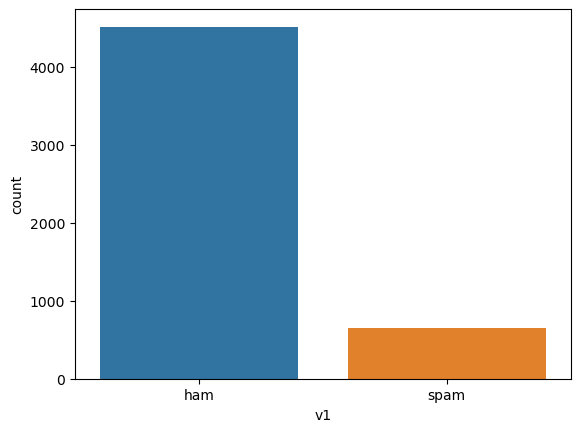

In [31]:
sns.countplot(x='v1', data=df)
plt.show()

In [32]:
#frequency table of spam column
df['Spam'].value_counts()


0    4516
1     653
Name: Spam, dtype: int64

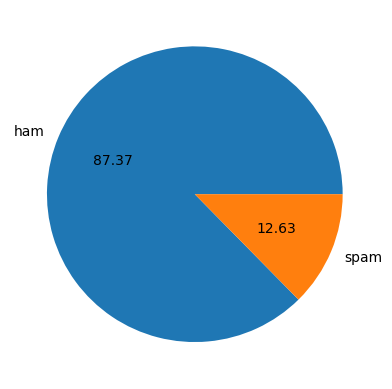

In [33]:
# plot the pie graph
plt.pie(df["Spam"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

In [34]:
import nltk
from nltk.corpus import stopwords
import string

In [35]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
def process(v2):
    nopunc = [char for char in v2 if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['v2'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [37]:
#convert text to integer
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['v2'])

# Split data into train and test dataset

In [38]:
# Train and test the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message,df['Spam'],test_size=0.2,random_state=2)

In [1]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

In [40]:
# predict the model
y_pred=model.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [42]:
# Describe the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[896,   0],
       [ 22, 116]], dtype=int64)

In [43]:
# Describe the accuracy of model
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

97.87234042553192

In [44]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       1.00      0.84      0.91       138

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

